# Regression with an Abalone Dataset

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
file1 = pd.read_csv('../DataSets/train.csv')

In [104]:
file1.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [105]:
file1.shape

(90615, 10)

In [106]:
file1[file1['Rings'] > 0].shape

(90615, 10)

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [108]:
file1['Sex'] = encoder.fit_transform(file1['Sex'])

In [109]:
X_train = file1.drop(['id', 'Rings'], axis = 1)
y_train = file1['Rings']

In [110]:
file2 = pd.read_csv('../DataSets/test.csv')

In [111]:
X_test = file2.drop(['id'], axis = 1)

In [112]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [113]:
regression.fit(X_train, y_train)

LinearRegression()

In [114]:
predict = regression.predict(X_train)

In [115]:
predict[predict < 0]

array([-0.48419866, -1.24674691, -1.1870894 , -1.3799147 , -1.37055634,
       -0.53152927, -0.56614316, -1.58972321, -0.52374067, -0.42797821,
       -1.35470217, -0.34244814, -1.17013261, -1.58854985, -1.25305004,
       -0.25798197])

In [116]:
import statsmodels.api as sm

In [117]:
X_constant = sm.add_constant(X_train)

In [118]:
model = sm.OLS(y_train, X_train)

result = model.fit()

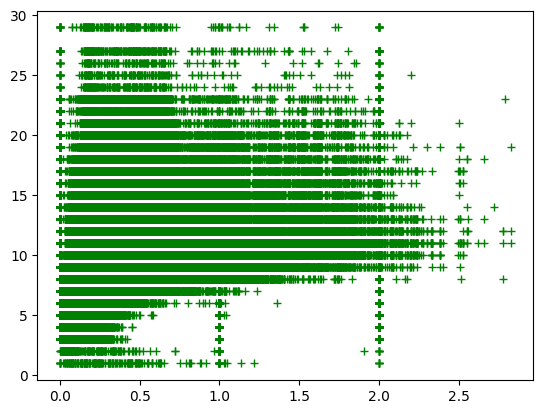

In [119]:
plt.plot(X_train, y_train, marker = '+', linestyle = '', c='green')
plt.show()

In [120]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Rings   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          2.722e+05
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:35:11   Log-Likelihood:                     -1.9316e+05
No. Observations:               90615   AIC:                                  3.863e+05
Df Residuals:                   90607   BIC:                                  3.864e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
polyreg = PolynomialFeatures(degree=2)

In [123]:
X_poly = polyreg.fit_transform(X_train)

In [124]:
X_poly

array([[1.000000e+00, 0.000000e+00, 5.500000e-01, ..., 2.146225e-02,
        3.516000e-02, 5.760000e-02],
       [1.000000e+00, 0.000000e+00, 6.300000e-01, ..., 7.645225e-02,
        8.848000e-02, 1.024000e-01],
       [1.000000e+00, 1.000000e+00, 1.600000e-01, ..., 9.000000e-06,
        1.500000e-05, 2.500000e-05],
       ...,
       [1.000000e+00, 1.000000e+00, 4.350000e-01, ..., 6.162250e-03,
        6.397750e-03, 6.642250e-03],
       [1.000000e+00, 1.000000e+00, 3.450000e-01, ..., 2.401000e-03,
        3.430000e-03, 4.900000e-03],
       [1.000000e+00, 1.000000e+00, 4.250000e-01, ..., 6.162250e-03,
        8.242500e-03, 1.102500e-02]])

In [125]:
regression.fit(X_poly, y_train)

LinearRegression()

In [126]:
predict = regression.predict(X_poly)

In [127]:
X_poly.shape

(90615, 45)

In [128]:
y_train.shape

(90615,)

In [129]:
predict[predict < 0]

array([], dtype=float64)

In [130]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_train, predict)

0.02454549108080008

In [131]:
X_test['Sex'] = encoder.fit_transform(X_test['Sex'])

In [132]:
X_test = polyreg.fit_transform(X_test)

In [133]:
predict2 = regression.predict(X_test)

In [134]:
predict2[predict2 < 0]

array([], dtype=float64)

In [147]:
np.savetxt("output.csv", predict2, delimiter=",")

In [148]:
file2['id']

0         90615
1         90616
2         90617
3         90618
4         90619
          ...  
60406    151021
60407    151022
60408    151023
60409    151024
60410    151025
Name: id, Length: 60411, dtype: int64

In [159]:
file2['id'].values

array([ 90615,  90616,  90617, ..., 151023, 151024, 151025])

In [164]:
predict2.shape

(60411,)

In [160]:
predict2

array([ 9.38523035,  9.82367049, 10.49323688, ..., 11.63954543,
       12.9922237 ,  8.48072508])

In [165]:
file2['id'].values.shape

(60411,)

In [167]:
array3 = np.stack((file2['id'].values, predict2), axis = 1)

In [168]:
array3

array([[9.06150000e+04, 9.38523035e+00],
       [9.06160000e+04, 9.82367049e+00],
       [9.06170000e+04, 1.04932369e+01],
       ...,
       [1.51023000e+05, 1.16395454e+01],
       [1.51024000e+05, 1.29922237e+01],
       [1.51025000e+05, 8.48072508e+00]])

In [169]:
np.savetxt('output2.csv', array3, delimiter=',')

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

# Create a Linear Regression model
model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best RMSE score on validation data:", (-grid_search.best_score_) ** 0.5)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_rmse = ((best_model.predict(X_test) - y_test) ** 2).mean() ** 0.5
print("RMSE score on test data:", test_rmse)